[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/anytko/geog-510/blob/main/book/labs/lab_05.ipynb)

# Lab 5

## Exercise 1: Calculating Distances with Functions

- Define a function `calculate_distance` that takes two geographic coordinates (latitude and longitude) and returns the distance between them using the Haversine formula.
- Use this function to calculate the distance between multiple pairs of coordinates.

In [1]:
from math import radians, sin, cos, sqrt, atan2

def calculate_distance(lat1, lon1, lat2, lon2, radius=6371.0):
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = (
        sin(dlat / 2) ** 2
        + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon / 2) ** 2
    )
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = radius * c
    return distance

dist1 = calculate_distance(lat1=52.2296756, lon1=21.0122287, lat2=41.8919300, lon2=12.5113300)
dist2 = calculate_distance(lat1=-34.6037, lon1=-58.3816, lat2=19.4326, lon2=-99.1332)
print(f"Distance between Warsaw and Rome: {dist1:.2f} km")
print(f"Distance between Buenos Aires and Mexico City: {dist2:.2f} km")


Distance between Warsaw and Rome: 1315.51 km
Distance between Buenos Aires and Mexico City: 7392.18 km


## Exercise 2: Batch Distance Calculation

- Create a function `batch_distance_calculation` that accepts a list of coordinate pairs and returns a list of distances between consecutive pairs.
- Test the function with a list of coordinates representing several cities.

In [3]:
def batch_distance_calculation(coord_list):
    distances = []
    for i in range(len(coord_list) - 1):
        lat1, lon1 = coord_list[i]
        lat2, lon2 = coord_list[i + 1]
        distance = calculate_distance(lat1, lon1, lat2, lon2)
        distances.append(distance)
    return distances


coordinate_list = [
    (51.5074, -0.1278), # London,  
    (48.8566, 2.3522), # Paris,   
    (40.7128, -74.0060), # New York, 
    (34.0522, -118.2437), # Los Angeles
    (35.6895, 139.6917) # Tokyo
]

distances = batch_distance_calculation(coordinate_list)
print(distances)

[343.55606034104164, 5837.24090382584, 3935.746254609723, 8815.4733558094]


## Exercise 3: Creating and Using a Point Class

- Define a `Point` class to represent a geographic point with attributes `latitude`, `longitude`, and `name`.
- Add a method `distance_to` that calculates the distance from one point to another.
- Instantiate several `Point` objects and calculate the distance between them.

In [4]:
class Point:
    def __init__(self, latitude, longitude, name):
        self.latitude = latitude
        self.longitude = longitude
        self.name = name
    def distance_to(self, second_point):
        return calculate_distance(self.latitude, self.longitude, second_point.latitude, second_point.longitude)
    
point1 = Point(52.2296756, 21.0122287, "Warsaw")
point2 = Point(41.8919300, 12.5113300, "Rome")
point3 = Point(-34.6037, -58.3816, "Buenos Aires")
point4 = Point(19.4326, -99.1332, "Mexico City")

print(f"Distance between {point1.name} and {point2.name}: {point1.distance_to(point2):.2f} km")
print(f"Distance between {point3.name} and {point4.name}: {point3.distance_to(point4):.2f} km")
print(f"Distance between {point1.name} and {point3.name}: {point1.distance_to(point3):.2f} km")




Distance between Warsaw and Rome: 1315.51 km
Distance between Buenos Aires and Mexico City: 7392.18 km
Distance between Warsaw and Buenos Aires: 12327.27 km


## Exercise 4: Reading and Writing Files

- Write a function `read_coordinates` that reads a file containing a list of coordinates (latitude, longitude) and returns them as a list of tuples.
- Write another function `write_coordinates` that takes a list of coordinates and writes them to a new file.
- Ensure that both functions handle exceptions, such as missing files or improperly formatted data.

In [5]:

def read_coordinates(input_file):
    coordinates = ()
    try:
        with open(input_file, "r") as infile:
            lines = infile.readlines()
            coordinates = tuple(map(str.strip, lines))  
    except FileNotFoundError:
        print(f"Error: File '{input_file}' not found.")
    except Exception as e:
        print(f"Error: {e}")
    
    return coordinates


def write_coordinates(output_file, coord_list):
    try:
        if not isinstance(coord_list, (list)):
            raise TypeError("coord_list must be a list of coordinate pairs.")
        with open(output_file, "w") as outfile:
            for coord in coord_list:
                outfile.write(f"{coord}\n")
    except (TypeError) as e:
        print(f"Error: {e}")
    except Exception as e:
        print(f"Error: {e}")


## Exercise 5: Processing Coordinates from a File

- Create a function that reads coordinates from a file and uses the `Point` class to create `Point` objects.
- Calculate the distance between each consecutive pair of points and write the results to a new file.
- Ensure the function handles file-related exceptions and gracefully handles improperly formatted lines.

In [6]:
# Create a sample coordinates.txt file
sample_data = """35.6895,139.6917
34.0522,-118.2437
51.5074,-0.1278
-33.8688,151.2093
48.8566,2.3522"""

output_file = "coordinates.txt"

try:
    with open(output_file, "w") as file:
        file.write(sample_data)
    print(f"Sample file '{output_file}' has been created successfully.")
except Exception as e:
    print(f"An error occurred while creating the file: {e}")

Sample file 'coordinates.txt' has been created successfully.


In [7]:


def read_and_process_points(input_file, output_file):
    try:
        points = []

        with open(input_file, 'r') as file:
            coordinates = file.readlines() 
            
            for i, line in enumerate(coordinates, start=1):
                coord = line.strip()
                lat, lon = map(float, coord.split(","))  
                point_name = f"point{i}" 
                point = Point(lat, lon, point_name)  
                points.append(point)  

        with open(output_file, "w") as file:
            for i in range(len(points) - 1):
                point1 = points[i]
                point2 = points[i + 1]
                distance = point1.distance_to(point2)  
                file.write(f"{distance:.2f}\n")   

        print(f"Distances successfully written to {output_file}")

    except Exception as e:
        print(f"Error during processing: {e}")

read_and_process_points('coordinates.txt', 'distances.txt')


Distances successfully written to distances.txt


## Exercise 6: Exception Handling in Data Processing

- Modify the `batch_distance_calculation` function to handle exceptions that might occur during the calculation, such as invalid coordinates.
- Ensure the function skips invalid data and continues processing the remaining data.

In [8]:
def batch_distance_calculation(coord_list):
    distances = []
    
    for i in range(len(coord_list) - 1):
        try:
            lat1, lon1 = coord_list[i]
            lat2, lon2 = coord_list[i + 1]

            if not (-90 <= lat1 <= 90) or not (-180 <= lon1 <= 180):
                raise ValueError(f"Invalid coordinates: ({lat1}, {lon1})")
            if not (-90 <= lat2 <= 90) or not (-180 <= lon2 <= 180):
                raise ValueError(f"Invalid coordinates: ({lat2}, {lon2})")

            distance = calculate_distance(lat1, lon1, lat2, lon2)
            distances.append(distance)

        except (ValueError, TypeError) as e:
            print(f"Skipping invalid coordinates pair: {e}")  
            continue 
    
    return distances


coordinate_list = [
    (51.5074, -0.1278), # London,  
    (48.8566, 500.7819), # Paris with invalid longitude,   
    (40.7128, -74.0060), # New York, 
    (34.0522, -118.2437), # Los Angeles
    (35.6895, 139.6917) # Tokyo
]

distances_new = batch_distance_calculation(coordinate_list)
print(distances_new)

Skipping invalid coordinates pair: Invalid coordinates: (48.8566, 500.7819)
Skipping invalid coordinates pair: Invalid coordinates: (48.8566, 500.7819)
[3935.746254609723, 8815.4733558094]


## Exercise 7: NumPy Array Operations and Geospatial Coordinates

In this exercise, you will work with NumPy arrays representing geospatial coordinates (latitude and longitude) and perform basic array operations.

1. Create a 2D NumPy array containing the latitude and longitude of the following cities: Tokyo (35.6895, 139.6917), New York (40.7128, -74.0060), London (51.5074, -0.1278), and Paris (48.8566, 2.3522).
2. Convert the latitude and longitude values from degrees to radians using np.radians().
3. Calculate the element-wise difference between Tokyo and the other cities' latitude and longitude in radians.

In [9]:
import numpy as np
arr_cities = np.array([[35.6895, 139.6917], [40.7128, -74.0060], [51.5074, -0.1278], [48.8566, 2.3522]])
print(f"2D Array:\n{arr_cities}")


cities_radians = np.radians(arr_cities)
print(f"Coordinates in radians:\n{cities_radians}")

def elementwise_difference(tokyo_coords, cities_coords):
    return cities_coords - tokyo_coords

tokyo_radians = cities_radians[0]

differences = elementwise_difference(tokyo_radians, cities_radians[1:])

print("Element-wise differences (in radians):")
print(differences)



2D Array:
[[ 3.568950e+01  1.396917e+02]
 [ 4.071280e+01 -7.400600e+01]
 [ 5.150740e+01 -1.278000e-01]
 [ 4.885660e+01  2.352200e+00]]
Coordinates in radians:
[[ 6.22899283e-01  2.43808010e+00]
 [ 7.10572408e-01 -1.29164837e+00]
 [ 8.98973719e-01 -2.23053078e-03]
 [ 8.52708531e-01  4.10536347e-02]]
Element-wise differences (in radians):
[[ 0.08767312 -3.72972847]
 [ 0.27607444 -2.44031063]
 [ 0.22980925 -2.39702647]]


## Exercise 8: Pandas DataFrame Operations with Geospatial Data

In this exercise, you'll use Pandas to load and manipulate a dataset containing city population data, and then calculate and visualize statistics.

1. Load the world cities dataset from this URL using Pandas: https://github.com/opengeos/datasets/releases/download/world/world_cities.csv
2. Display the first 5 rows and check for missing values.
3. Filter the dataset to only include cities with a population greater than 1 million.
4. Group the cities by their country and calculate the total population for each country.
5. Sort the cities by population in descending order and display the top 10 cities.

In [10]:
import pandas as pd

df = pd.read_csv("https://github.com/opengeos/datasets/releases/download/world/world_cities.csv")
print(df.head(5))

if df.isna().sum().sum() == 0:
    print("No missing values in the DataFrame.")
else:
    print(f"There are {df.isna().sum().sum()} missing values in the DataFrame.")

df_filtered = df[df["population"] > 1000000]

grouped = df_filtered.groupby('country')
country_population = grouped['population'].sum()

top_10_cities = df_filtered.sort_values(by='population', ascending=False).head(10)

print(top_10_cities[['name', 'country', 'population']])


   id         name country  latitude  longitude  population
0   1        Bombo     UGA    0.5833    32.5333       75000
1   2  Fort Portal     UGA    0.6710    30.2750       42670
2   3      Potenza     ITA   40.6420    15.7990       69060
3   4   Campobasso     ITA   41.5630    14.6560       50762
4   5        Aosta     ITA   45.7370     7.3150       34062
No missing values in the DataFrame.
              name country  population
1239         Tokyo     JPN    35676000
1224      New York     USA    19040000
1230   Mexico City     MEX    19028000
1240        Mumbai     IND    18978000
1245     Sao Paulo     BRA    18845000
1148         Delhi     IND    15926000
1238      Shanghai     CHN    14987000
1243       Kolkata     IND    14787000
1175         Dhaka     BGD    12797394
1217  Buenos Aires     ARG    12795000


## Exercise 9: Creating and Manipulating GeoDataFrames with GeoPandas

This exercise focuses on creating and manipulating GeoDataFrames, performing spatial operations, and visualizing the data.

1. Load the New York City building dataset from the GeoJSON file using GeoPandas: https://github.com/opengeos/datasets/releases/download/places/nyc_buildings.geojson
2. Create a plot of the building footprints and color them based on the building height (use the `height_MS` column).
3. Create an interactive map of the building footprints and color them based on the building height (use the `height_MS` column).
4. Calculate the average building height (use the `height_MS` column).
5. Select buildings with a height greater than the average height.
6. Save the GeoDataFrame to a new GeoJSON file.

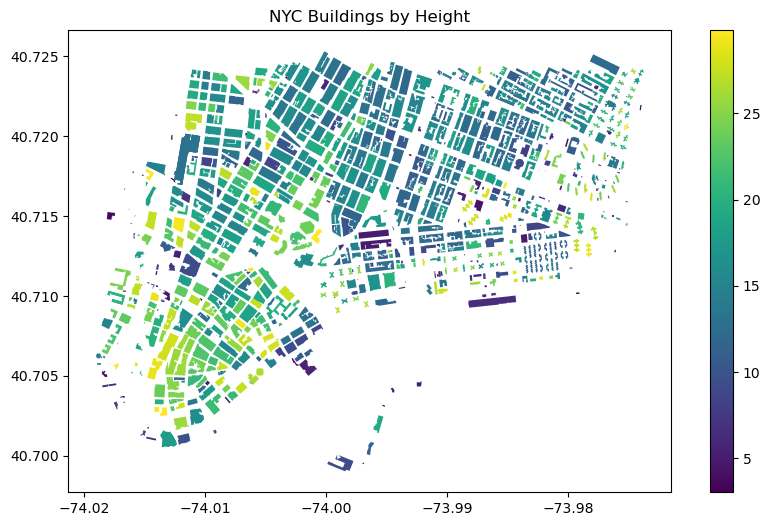

The average building height is: 15.454691136974038 meters


In [12]:
import geopandas as gpd
import matplotlib.pyplot as plt

url = "https://github.com/opengeos/datasets/releases/download/places/nyc_buildings.geojson"

gdf = gpd.read_file(url)


gdf['height_MS'] = pd.to_numeric(gdf['height_MS'], errors='coerce')


gdf.plot("height_MS", legend=True, figsize=(10, 6))
plt.title("NYC Buildings by Height")
plt.show()


interactive_map = gdf.explore("height_MS", legend=True)


avg_height = gdf['height_MS'].mean()

print(f"The average building height is: {avg_height} meters")

gdf_above_average = gdf[gdf['height_MS'] > avg_height]

gdf_above_average.to_file("nyc_buildings_above_average_height.geojson", driver="GeoJSON")

interactive_map



## Exercise 10: Combining NumPy, Pandas, and GeoPandas

This exercise requires you to combine the power of NumPy, Pandas, and GeoPandas to analyze and visualize spatial data.

1. Use Pandas to load the world cities dataset from this URL: https://github.com/opengeos/datasets/releases/download/world/world_cities.csv
2. Filter the dataset to include only cities with latitude values between -40 and 60 (i.e., cities located in the Northern Hemisphere or near the equator).
3. Create a GeoDataFrame from the filtered dataset by converting the latitude and longitude into geometries.
4. Reproject the GeoDataFrame to the Mercator projection (EPSG:3857).
5. Calculate the distance (in meters) between each city and the city of Paris.
6. Plot the cities on a world map, coloring the points by their distance from Paris.

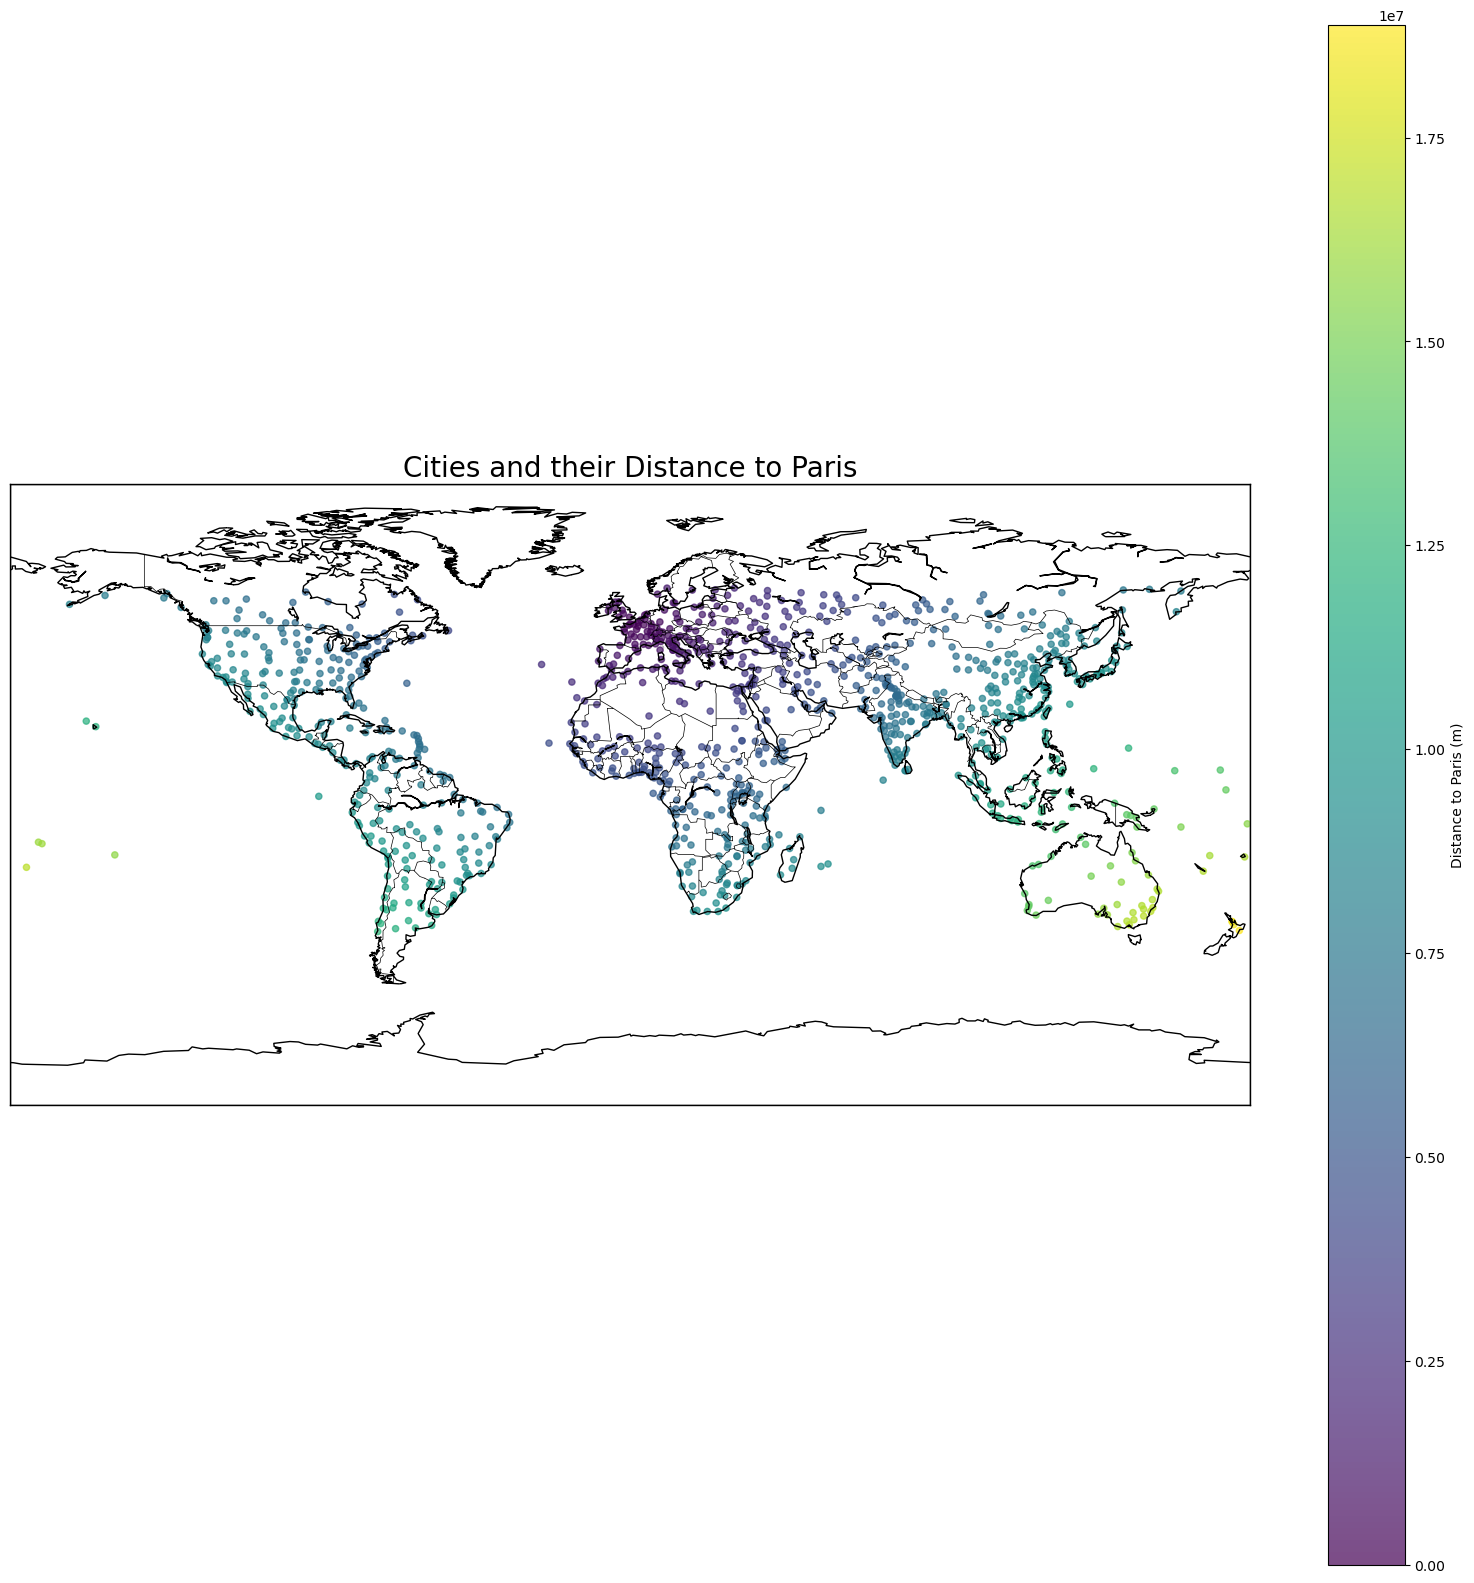

In [13]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

url = "https://github.com/opengeos/datasets/releases/download/world/world_cities.csv"
df = pd.read_csv(url)

df_filtered = df[(df["latitude"] > -40) & (df["latitude"] < 60)]

gdf = gpd.GeoDataFrame(df_filtered, geometry=gpd.points_from_xy(df_filtered.longitude, df_filtered.latitude))
gdf.set_crs("EPSG:4326", inplace=True)

gdf = gdf.to_crs("EPSG:3857")


def haversine_np(lat1, lon1, lat2, lon2):
    R = 6371000.0  # Earth radius in meters
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = (
        np.sin(dlat / 2) ** 2
        + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2) ** 2
    )
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c  # Distance in meters
    return distance

paris_gdf = gdf[gdf['name'] == 'Paris']


paris_lat = paris_gdf['latitude'].values[0]
paris_lon = paris_gdf['longitude'].values[0]


gdf['distance_to_paris'] = gdf.apply(
    lambda row: haversine_np(paris_lat, paris_lon, row['latitude'], row['longitude']),
    axis=1
)


fig, ax = plt.subplots(figsize=(20, 20))  


m = Basemap(projection='cyl', resolution='c', ax=ax)  
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='white')  


lons = gdf['longitude'].values
lats = gdf['latitude'].values


scatter = m.scatter(lons, lats, c=gdf['distance_to_paris'], cmap='viridis', marker='o', s=20, alpha=0.7)


plt.colorbar(scatter, label='Distance to Paris (m)')


plt.title('Cities and their Distance to Paris', fontsize=20)


plt.show()






## Submission Requirements

Complete the exercises above and and upload the notebook to your GitHub repository. Make sure the notebook has a Colab badge at the top so that it can be easily opened in Google Colab. Submit the URL of the notebook to Canvas.